**Climate losses of strong economies**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import wb

In [ ]:
# install pyeurostat library
!pip install eurostat

In [ ]:
import eurostat

In [ ]:
data = eurostat.get_data_df('CLI_IAD_LOSS')
data.head(5)

,freq,statinfo,stk_flow,unit,geo\TIME_PERIOD,1980,1981,1982,1983,1984,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,AVG_30Y,LOSS,EUR_HAB,AT,NaN,NaN,NaN,NaN,NaN,...,39.03,38.73,38.29,37.88,40.38,41.55,43.52,42.30,44.38,44.70
1,A,AVG_30Y,LOSS,EUR_HAB,BE,NaN,NaN,NaN,NaN,NaN,...,8.37,10.49,10.43,10.76,10.80,11.34,12.08,9.49,40.30,42.26
2,A,AVG_30Y,LOSS,EUR_HAB,BG,NaN,NaN,NaN,NaN,NaN,...,11.35,16.51,21.80,21.96,22.12,22.28,22.43,22.60,22.79,24.44
3,A,AVG_30Y,LOSS,EUR_HAB,CH,NaN,NaN,NaN,NaN,NaN,...,70.29,69.54,68.55,65.90,53.28,52.63,52.96,49.78,50.79,49.58
4,A,AVG_30Y,LOSS,EUR_HAB,CY,NaN,NaN,NaN,NaN,NaN,...,8.31,8.41,8.45,16.32,16.17,15.09,14.89,14.72,14.77,14.57


In [ ]:
# Generate a list of years as strings between 2010 and 2020
years = [str(year) for year in range(2010, 2021)]

# Define filter conditions based on specific columns in the dataset
filter_condition = (
    (data['statinfo'] == 'VAL_A') &  # Selecting specific statistical information
    (data['stk_flow'] == 'LOSS') &     # Filtering by stock flow type 'LOSS'
    (data['unit'] == 'MIO_EUR')        # Filtering by monetary unit 'MIO_EUR'
)

# Apply the filter conditions to the dataset and create a filtered DataFrame
filtered_df = data[filter_condition]

# Select only the columns related to geographical information and the specified years
filtered_df = filtered_df[['geo\\TIME_PERIOD'] + years]

# Rename the column related to geographical information for clarity
filtered_df = filtered_df.rename(columns={'geo\\TIME_PERIOD': 'geo'})

# Print the resulting filtered DataFrame
print(filtered_df)

           geo     2010    2011    2012     2013     2014     2015    2016  \
105         AT      0.0     0.0    12.0    933.0      0.0      0.0     0.0   
106         BE    558.0    91.0     0.0      0.0    727.0      0.0   129.0   
107         BG      0.0     0.0     5.0      0.0   1104.0   1117.0     0.0   
108         CH     14.0     0.0     0.0    255.0    101.0      8.0     0.0   
109         CY      0.0     0.0     0.0      0.0      0.0      0.0   202.0   
110         CZ    777.0     0.0    45.0   1856.0     16.0      0.0    62.0   
111         DE   5593.0   826.0   149.0  14410.0   2987.0   2755.0  3703.0   
112         DK    118.0   913.0     0.0    930.0     90.0      0.0     0.0   
113         EE     52.0     0.0     0.0      0.0      0.0      0.0     0.0   
114         EL      1.0     0.0     0.0     16.0      5.0     12.0    54.0   
115         ES   1162.0   170.0   347.0     13.0      0.0    184.0   385.0   
116  EU27_2020  21515.0  6743.0  4146.0  21797.0  12976.0  11552

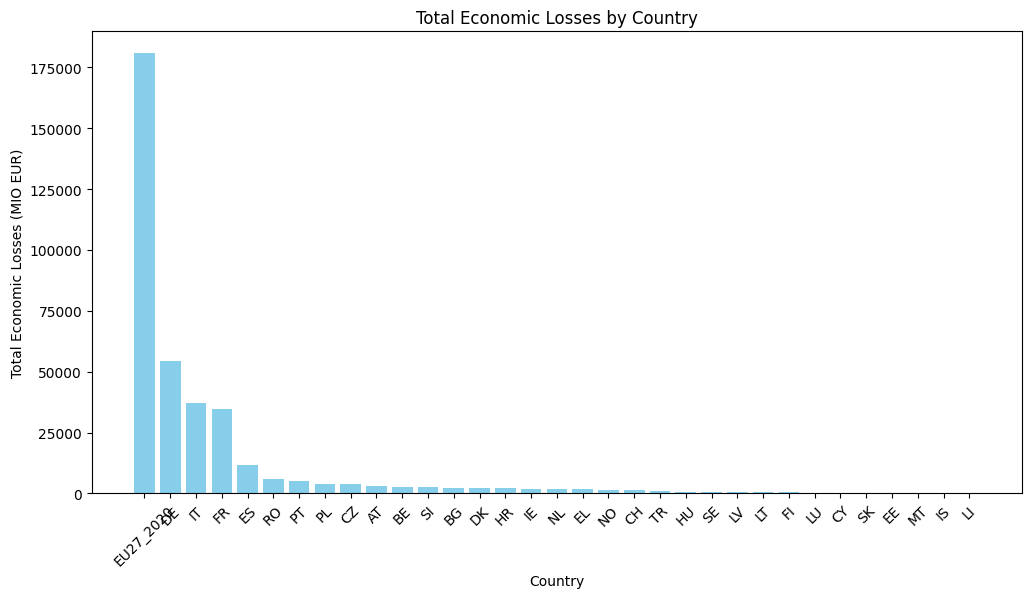

In [ ]:
# Create a new column 'Total Economic Losses' by summing the economic losses for each year
filtered_df['Total Economic Losses'] = filtered_df[['2010','2011','2012','2013', '2014', '2015', '2016', '2017', '2018', '2019','2020']].sum(axis=1)

# Sort the DataFrame by the 'Total Economic Losses' column in descending order
sorted_df = filtered_df.sort_values(by='Total Economic Losses', ascending=False)

# Plot the total economic losses for all countries
plt.figure(figsize=(12, 6))
plt.bar(sorted_df['geo'], sorted_df['Total Economic Losses'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Economic Losses (MIO EUR)')
plt.title('Total Economic Losses by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
selected_countries = ['IT', 'DE', 'FR', 'ES']
filtered_countries_df = filtered_df[filtered_df['geo'].isin(selected_countries)]

print(filtered_countries_df)

    geo    2010    2011    2012     2013    2014    2015    2016     2017  \
111  DE  5593.0   826.0   149.0  14410.0  2987.0  2755.0  3703.0   5367.0   
115  ES  1162.0   170.0   347.0     13.0     0.0   184.0   385.0    395.0   
118  FR  5023.0  1702.0  1595.0   1789.0  2737.0   772.0  1970.0   5996.0   
123  IT   729.0  2559.0  1227.0    653.0  1728.0  2923.0  2052.0  12374.0   

       2018    2019    2020  Total Economic Losses  
111  9520.0  7742.0  1508.0                54560.0  
115  2054.0  4661.0  2282.0                11653.0  
118  3235.0  5419.0  4527.0                34765.0  
123  5355.0  4948.0  2552.0                37100.0  


In [ ]:
# Remove 'Total Economic Losses' column
filtered_countries_df = filtered_countries_df.drop(columns=['Total Economic Losses'], errors='ignore')

# Transforming DataFrame
melted_df = pd.melt(filtered_countries_df, id_vars=['geo'], var_name='year', value_name='economic_losses')

# Renaming 'geo' column to 'country'
melted_df = melted_df.rename(columns={'geo': 'country'})

# Converting 'year' column to integer
melted_df['year'] = melted_df['year'].astype(int)

# Create a dictionary to map country codes to country names
country_names = {'DE': 'Germany', 'ES': 'Spain', 'FR': 'France', 'IT': 'Italy'}

# Replace the 'geo' column with country names
melted_df['country'] = melted_df['country'].map(country_names)

# Sort the DataFrame first by 'country' and then by 'year'
melted_df = melted_df.sort_values(by=['country', 'year'])

print(melted_df)


    country  year  economic_losses
2    France  2010           5023.0
6    France  2011           1702.0
10   France  2012           1595.0
14   France  2013           1789.0
18   France  2014           2737.0
22   France  2015            772.0
26   France  2016           1970.0
30   France  2017           5996.0
34   France  2018           3235.0
38   France  2019           5419.0
42   France  2020           4527.0
0   Germany  2010           5593.0
4   Germany  2011            826.0
8   Germany  2012            149.0
12  Germany  2013          14410.0
16  Germany  2014           2987.0
20  Germany  2015           2755.0
24  Germany  2016           3703.0
28  Germany  2017           5367.0
32  Germany  2018           9520.0
36  Germany  2019           7742.0
40  Germany  2020           1508.0
3     Italy  2010            729.0
7     Italy  2011           2559.0
11    Italy  2012           1227.0
15    Italy  2013            653.0
19    Italy  2014           1728.0
23    Italy  2015   

In [ ]:
# install worldbank library
!pip install pandas-datareader

In [ ]:
!pip install world_bank_data --upgrade

  Preparing metadata (setup.py) ... done
  Created wheel for world_bank_data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11095 sha256=d6e8114548a8fc2037f50aa8b5c68a42172281bfac9273ffb9c08152b9ff2f6c
  Stored in directory: /root/.cache/pip/wheels/a3/ba/6f/7040ac2cf2d06ed4633fb9dd8bc2000a0cabf766b5a17d4d1a
Successfully built world_bank_data


In [ ]:
from pandas_datareader import wb

    country  year  NY.GDP.PCAP.CD
0   Germany  2020    46749.476228
1   Germany  2019    46805.138433
2   Germany  2018    47939.278288
3   Germany  2017    44652.589172
4   Germany  2016    42136.120791
5   Germany  2015    41103.256436
6   Germany  2014    48023.869985
7   Germany  2013    46298.922918
8   Germany  2012    43855.854466
9   Germany  2011    46705.895796
10  Germany  2010    41572.455948
11    Spain  2020    26984.296277
12    Spain  2019    29581.518551
13    Spain  2018    30379.721113
14    Spain  2017    28185.321367
15    Spain  2016    26537.159489
16    Spain  2015    25754.361029
17    Spain  2014    29513.651180
18    Spain  2013    29077.182056
19    Spain  2012    28322.946592
20    Spain  2011    31677.900308
21    Spain  2010    30532.480508
22   France  2020    39179.744260
23   France  2019    40494.898294
24   France  2018    41557.854859
25   France  2017    38781.049487
26   France  2016    37062.533572
27   France  2015    36652.922305
28   France  2

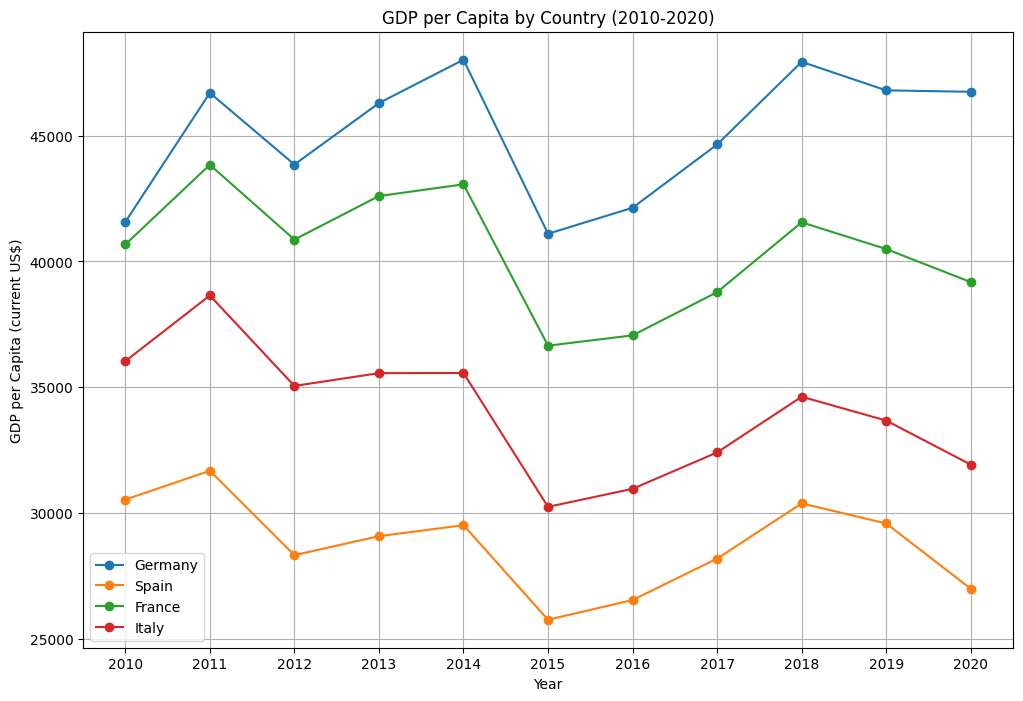

In [ ]:
# Necessary parameters for data download
start_year = 2010
end_year = 2020

# List of developed countries
developed_countries = ['DE', 'IT', 'FR', 'ES']
# Downloading the data
gdp_data = wb.download(indicator='NY.GDP.PCAP.CD', country=developed_countries, start=start_year, end=end_year)

# Resetting index to make 'country' and 'year' as columns
df = pd.DataFrame(gdp_data.reset_index())

# Showing the new DataFrame
print(df)

# Getting unique countries
countries = df['country'].unique()

# Creating a line plot for each country
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['NY.GDP.PCAP.CD'], label=country, marker='o')

plt.title('GDP per Capita by Country (2010-2020)')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (current US$)')
plt.legend()
plt.grid(True)

# Reverse the x-axis direction
plt.gca().invert_xaxis()

plt.show()

In [ ]:
print("melted_df:")
print(melted_df.head())

print("\ndf:")
print(df.head())


melted_df:
   country  year  economic_losses
2   France  2010           5023.0
6   France  2011           1702.0
10  France  2012           1595.0
14  France  2013           1789.0
18  France  2014           2737.0

df:
   country  year  NY.GDP.PCAP.CD
0  Germany  2020    46749.476228
1  Germany  2019    46805.138433
2  Germany  2018    47939.278288
3  Germany  2017    44652.589172
4  Germany  2016    42136.120791


In [ ]:
print(melted_df['year'].dtype)
print(df['year'].dtype)



int64
object


In [ ]:
df['year'] = df['year'].astype(int)


In [ ]:
merged_df = pd.merge(melted_df, df, on=['country', 'year'])
print(merged_df)


    country  year  economic_losses  NY.GDP.PCAP.CD
0    France  2010           5023.0    40676.064791
1    France  2011           1702.0    43846.466076
2    France  2012           1595.0    40870.852365
3    France  2013           1789.0    42602.717965
4    France  2014           2737.0    43068.548724
5    France  2015            772.0    36652.922305
6    France  2016           1970.0    37062.533572
7    France  2017           5996.0    38781.049487
8    France  2018           3235.0    41557.854859
9    France  2019           5419.0    40494.898294
10   France  2020           4527.0    39179.744260
11  Germany  2010           5593.0    41572.455948
12  Germany  2011            826.0    46705.895796
13  Germany  2012            149.0    43855.854466
14  Germany  2013          14410.0    46298.922918
15  Germany  2014           2987.0    48023.869985
16  Germany  2015           2755.0    41103.256436
17  Germany  2016           3703.0    42136.120791
18  Germany  2017           536

In [ ]:
correlation = merged_df['economic_losses'].corr(merged_df['NY.GDP.PCAP.CD'])
print("Correlation between Economic Losses and GDP per Capita:", correlation)


Correlation between Economic Losses and GDP per Capita: 0.38335290062979327


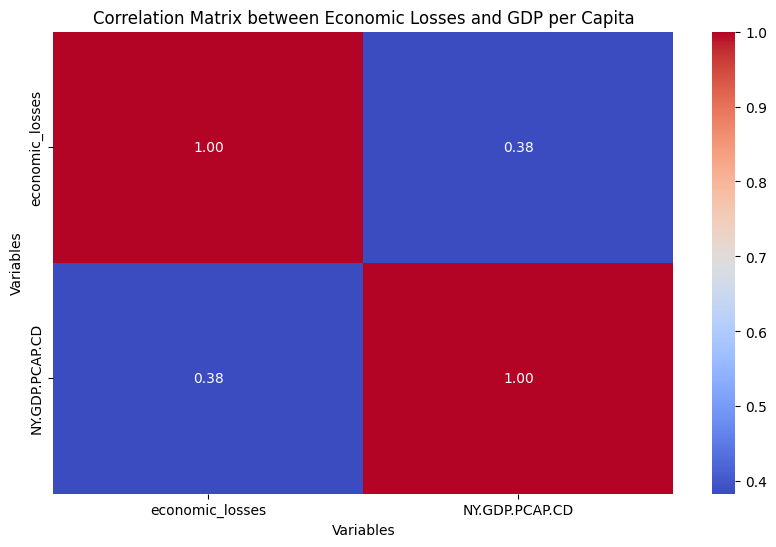

In [ ]:
import seaborn as sns

# Korelasyon matrisini hesaplayın
correlation_matrix = merged_df[['economic_losses', 'NY.GDP.PCAP.CD']].corr()

# Heatmap ile korelasyon matrisini görselleştirin
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Economic Losses and GDP per Capita')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()


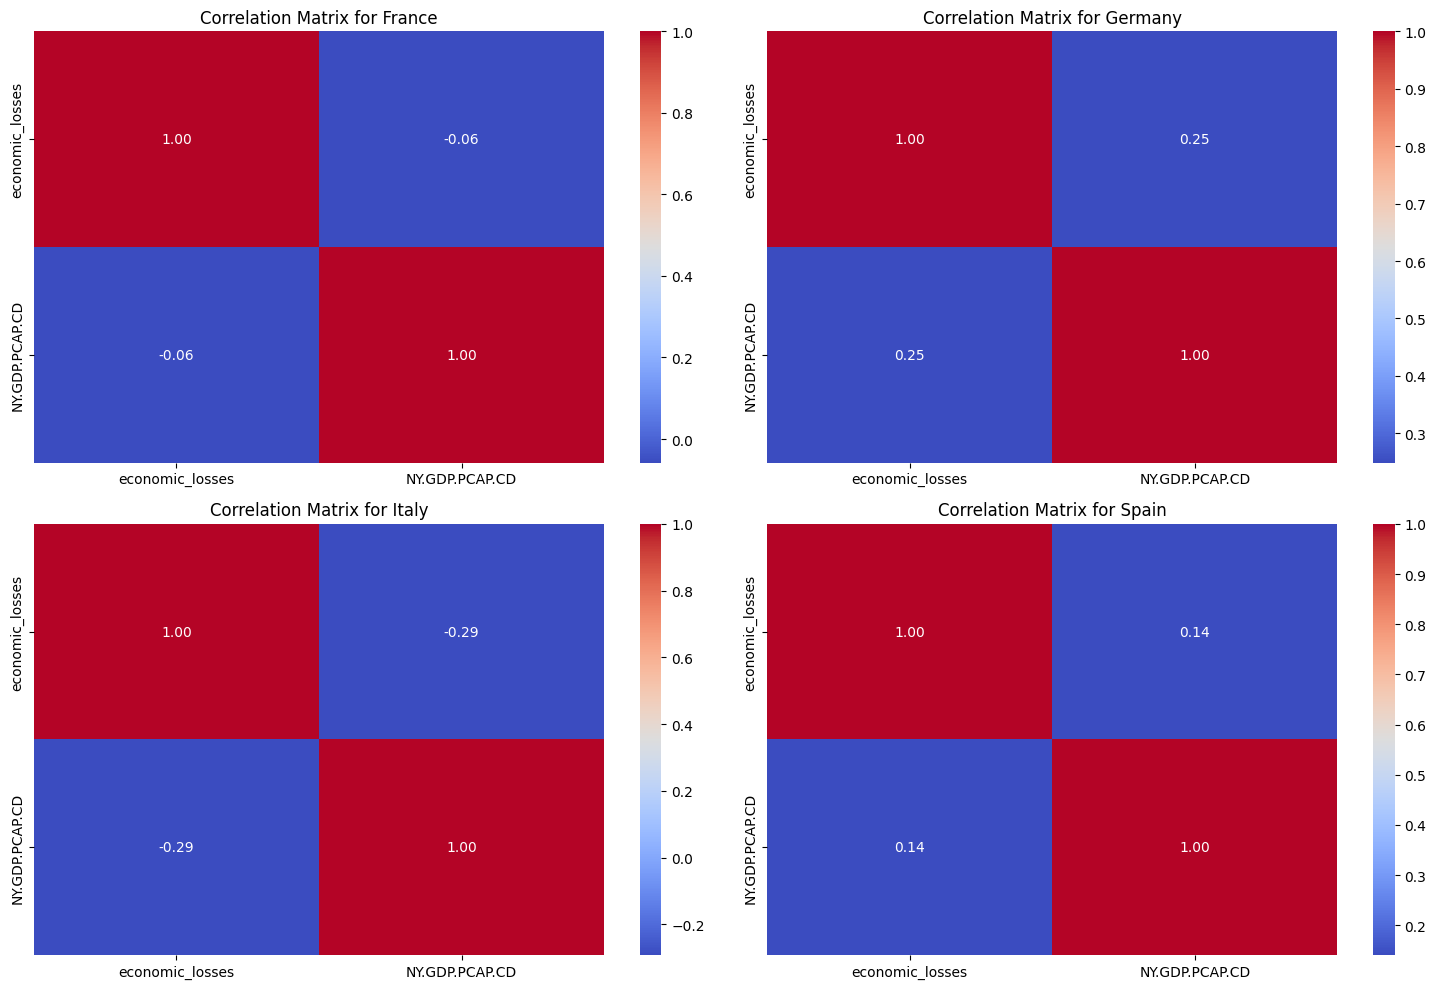

In [ ]:

# Get the list of countries
countries = merged_df['country'].unique()

# Define the number of columns for subplots
num_cols = 2

# Calculate the number of rows for subplots
num_rows = len(countries) // num_cols
if len(countries) % num_cols != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Calculate and visualize the correlation matrix for each country
for i, country in enumerate(countries):
    # Filter the data for the country
    country_data = merged_df[merged_df['country'] == country]

    # Calculate the correlation matrix
    correlation_matrix = country_data[['economic_losses', 'NY.GDP.PCAP.CD']].corr()

    # Visualize the correlation matrix with a heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[i])
    axes[i].set_title(f'Correlation Matrix for {country}')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(merged_df['NY.GDP.PCAP.CD'])  # GDP per Capita
y = merged_df['economic_losses']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        economic_losses   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     7.236
Date:                Thu, 28 Mar 2024   Prob (F-statistic):             0.0102
Time:                        08:04:54   Log-Likelihood:                -413.07
No. Observations:                  44   AIC:                             830.1
Df Residuals:                      42   BIC:                             833.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3629.7728   2555.248     -1.

<ipython-input-21-4774b4059219>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


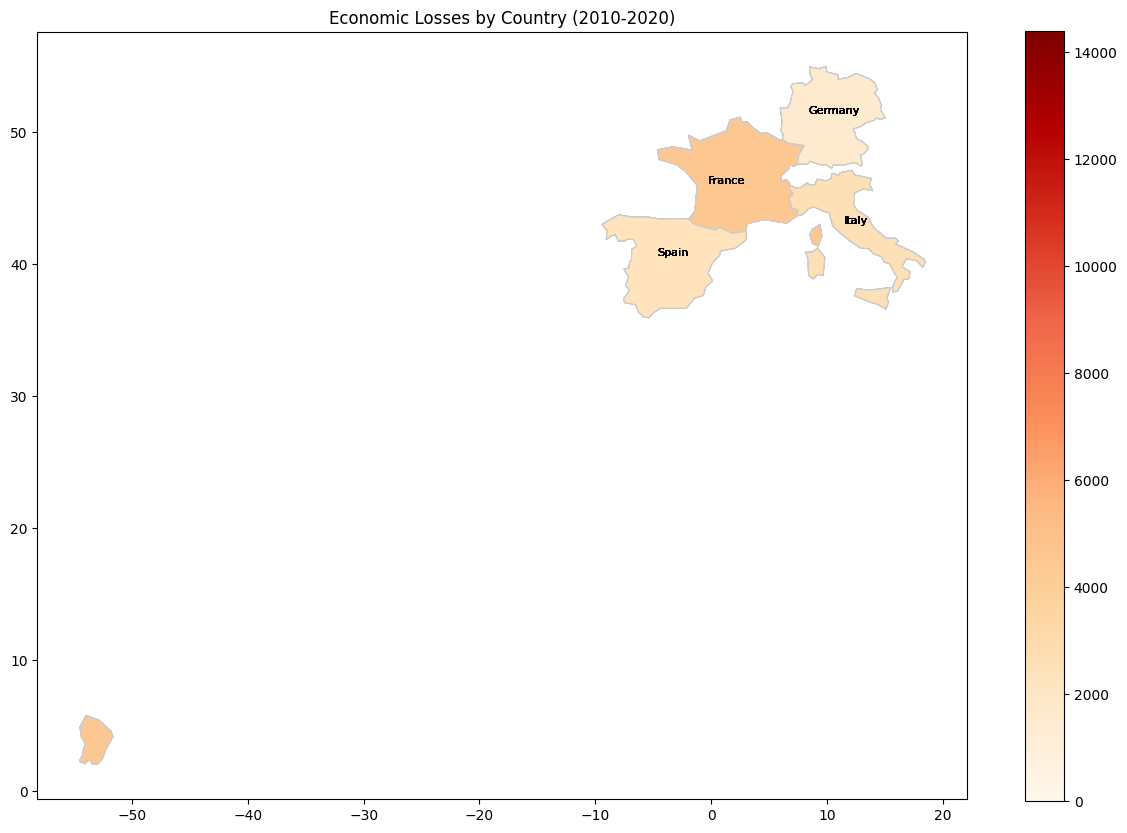

In [ ]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world shapefile with the merged_df DataFrame
world_merged = world.merge(melted_df, how='left', left_on='name', right_on='country')

# Filter to include only the countries present in merged_df
selected_countries = merged_df['country'].unique()
world_merged_filtered = world_merged[world_merged['country'].isin(selected_countries)]

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_merged_filtered.plot(column='economic_losses', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each country's centroid with its name
for idx, row in world_merged_filtered.iterrows():
    centroid = row.geometry.centroid
    # Adjust the xytext parameters for France
    xytext = (35, 35) if row['country'] == 'France' else (3, 3)
    ax.annotate(text=row['country'], xy=(centroid.x, centroid.y), xytext=xytext,
                textcoords='offset points', fontsize=8, ha='center', color='black')

ax.set_title('Economic Losses by Country (2010-2020)')
plt.show()



<ipython-input-22-6670ed73ee68>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 217


TypeError: Legend.__init__() got an unexpected keyword argument 'label'

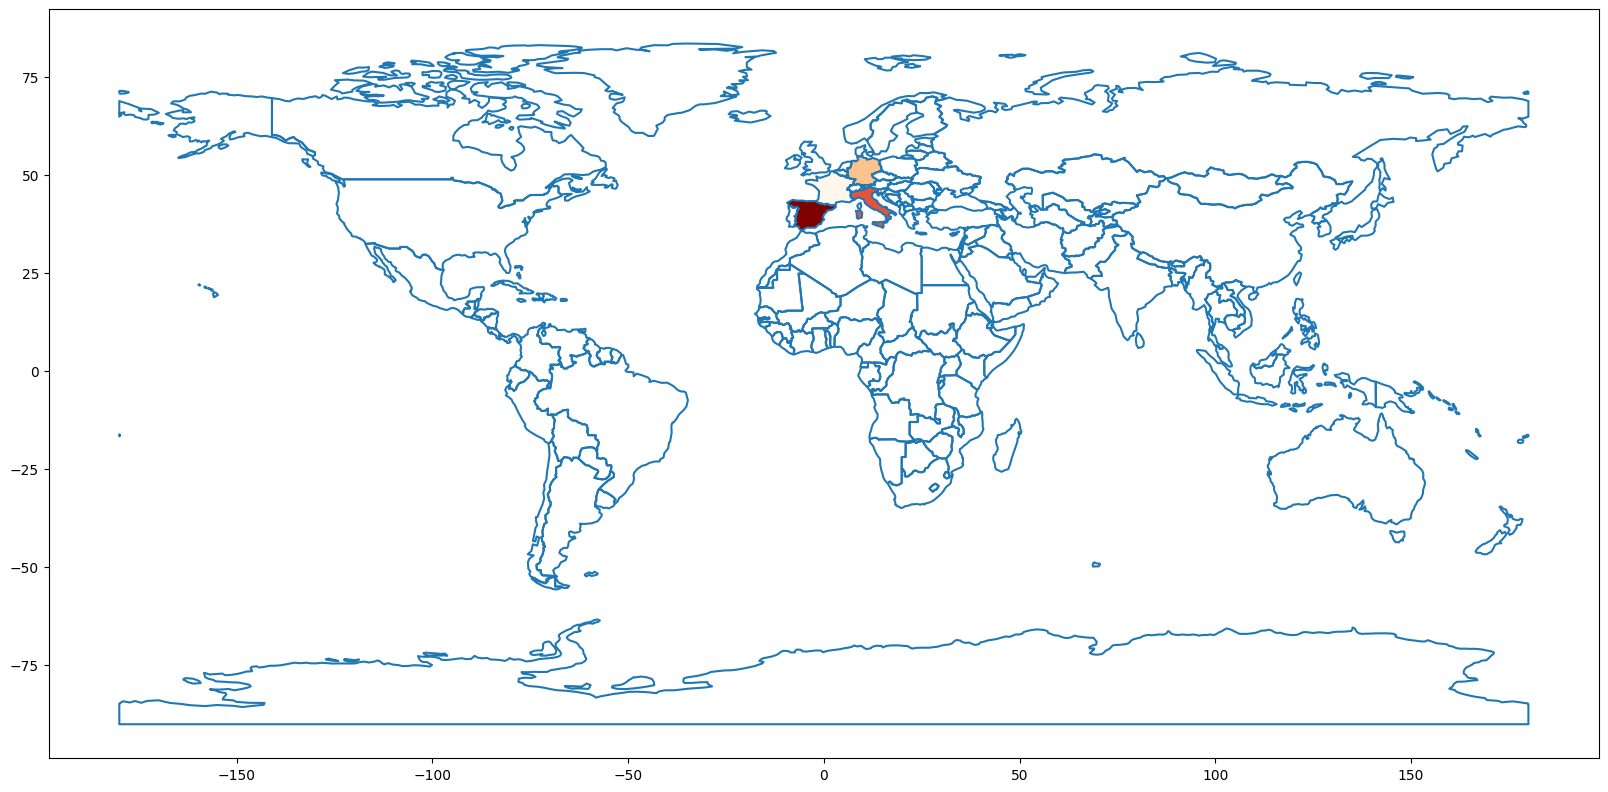

In [ ]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#df_world.plot(figsize=(10,6))
df_world_teams = df_world.merge(merged_df, how="left", left_on=['name'], right_on=['country'])
print("Type of DataFrame : ", type(df_world_teams), df_world_teams.shape[0])
df_world_teams.head()
ax = df_world["geometry"].boundary.plot(figsize=(20,16))
df_world_teams.plot( column="country", ax=ax, cmap='OrRd',
                     legend=True, legend_kwds={"label": "Economic Loses", "orientation":"horizontal"})
ax.set_title("Countries Economic Loses of the years 2010-2020")
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
df_world_teams.plot(column= 'country', ax=ax,  cax=cax, cmap='OrRd',
                    legend=True, legend_kwds={"label": "Participation"},
                    missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})

<ipython-input-23-9ae5fb29f08a>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


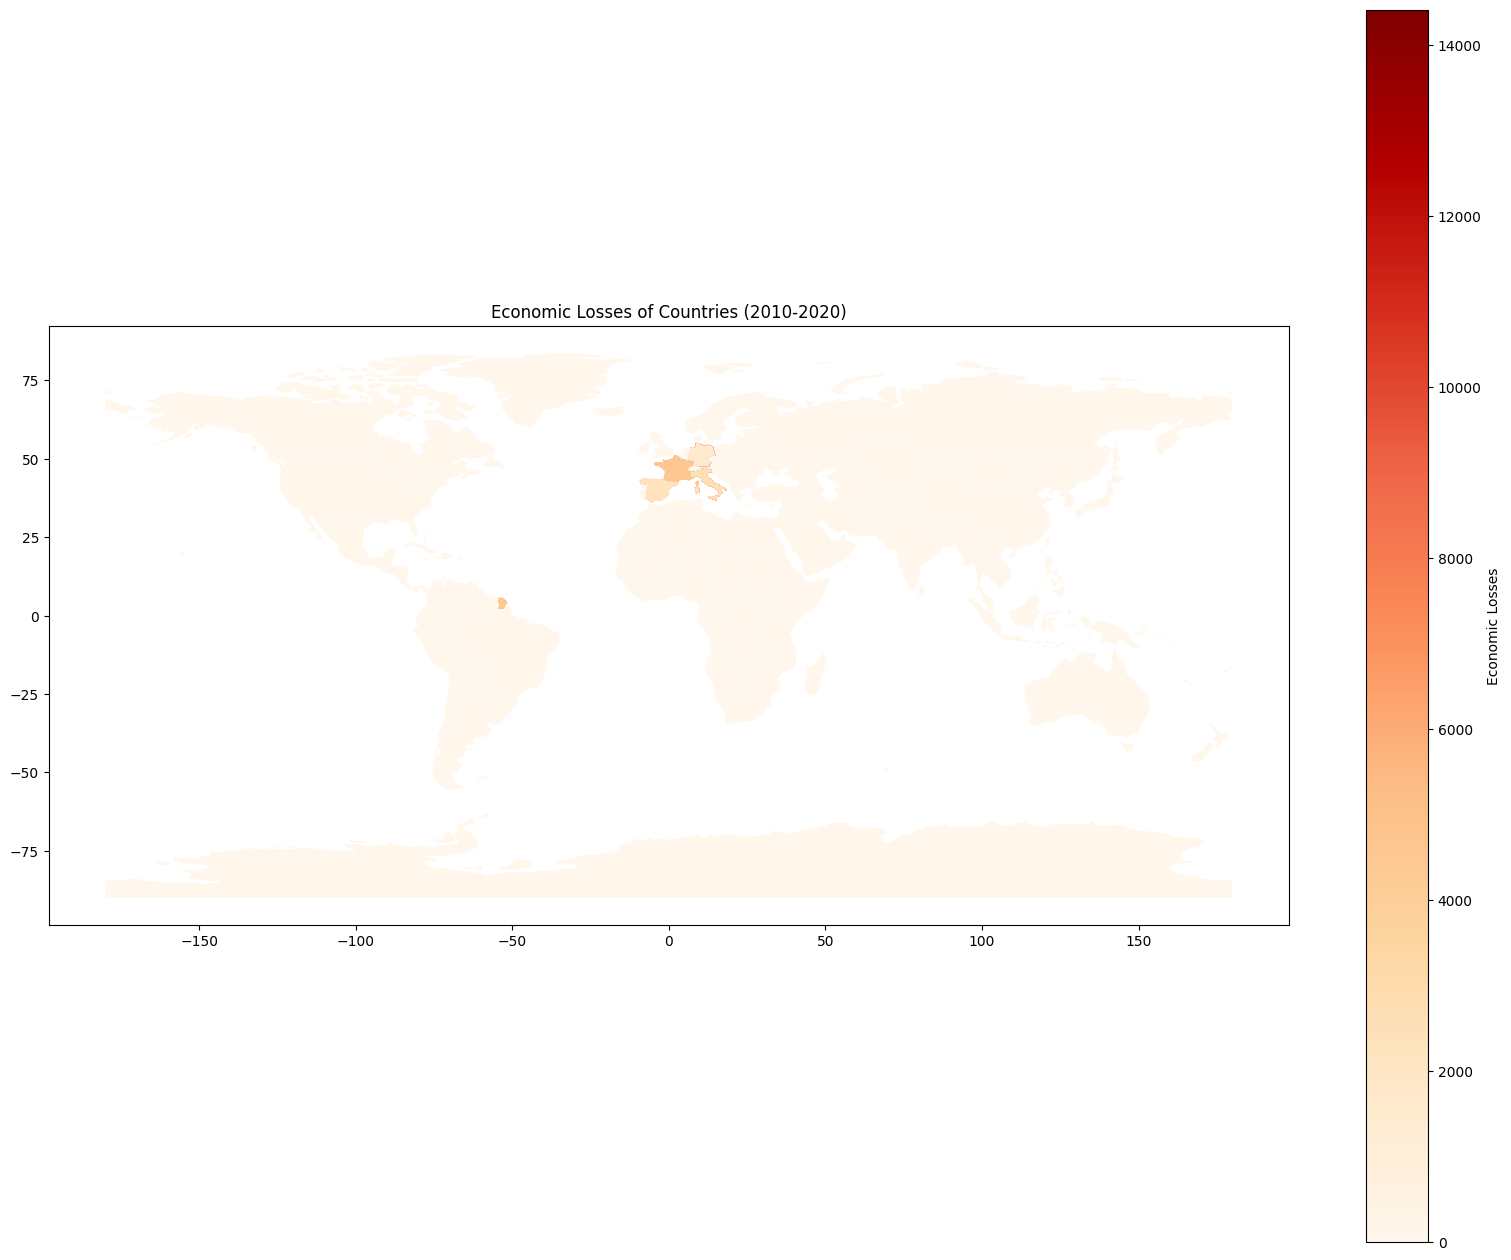

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Dünya haritasını yükleyin
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Veri çerçevenizle dünya haritasını birleştirin
df_world_teams = world.merge(merged_df, how="left", left_on='name', right_on='country')

# Boş değerleri doldurun
df_world_teams['economic_losses'] = df_world_teams['economic_losses'].fillna(0)
df_world_teams['NY.GDP.PCAP.CD'] = df_world_teams['NY.GDP.PCAP.CD'].fillna(0)

# Haritayı çizin
fig, ax = plt.subplots(1, 1, figsize=(20, 16))
df_world_teams.plot(column='economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Economic Losses"}, missing_kwds={"color": "lightgrey"})
ax.set_title("Economic Losses of Countries (2010-2020)")
plt.show()


<ipython-input-24-ffd8849e0ecf>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


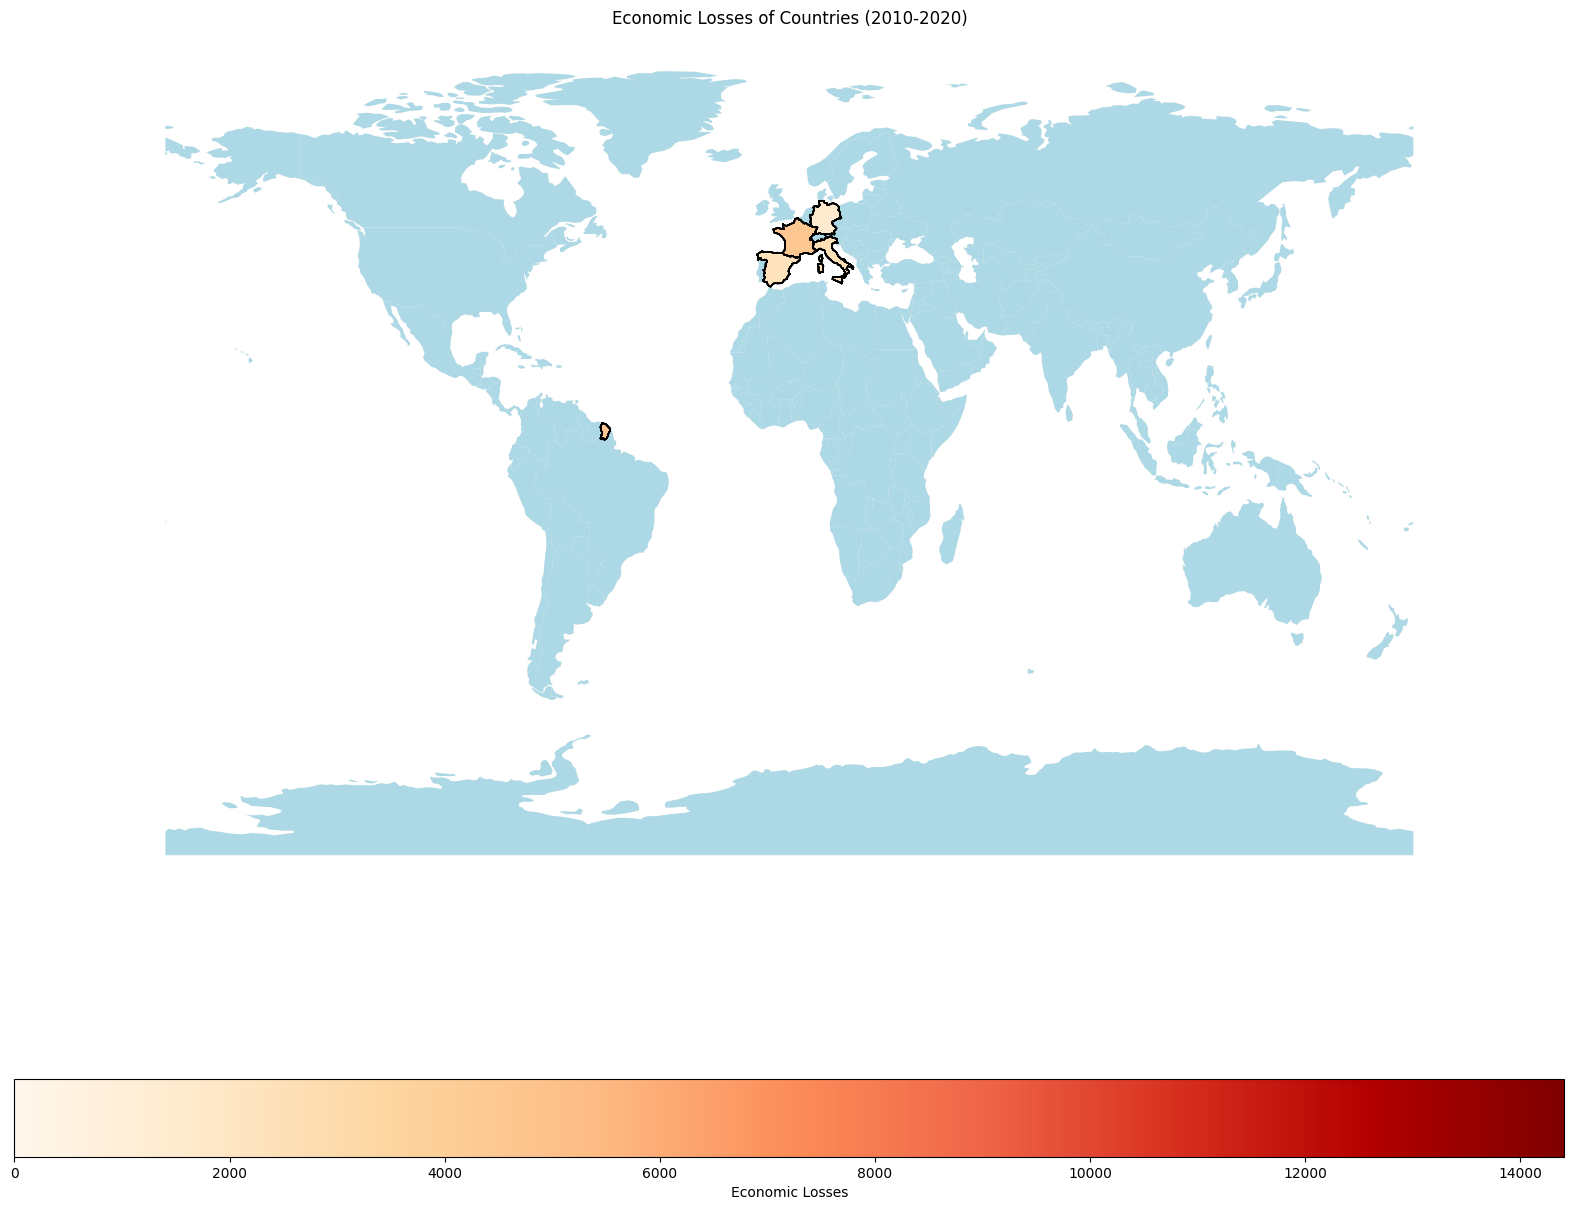

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Dünya haritasını yükleyin
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Veri çerçevesinizle dünya haritasını birleştirin
df_world_teams = world.merge(merged_df, how="left", left_on='name', right_on='country')

# Boş değerleri doldurun
df_world_teams['economic_losses'] = df_world_teams['economic_losses'].fillna(0)
df_world_teams['NY.GDP.PCAP.CD'] = df_world_teams['NY.GDP.PCAP.CD'].fillna(0)

# Haritayı oluşturun
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Ekonomik kayıpları gösteren bir harita oluşturun
df_world_teams.plot(column='economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Economic Losses", "orientation": "horizontal"})

# Ekonomik kayıp olmayan ülkeleri açık mavi renge boyayın
world[~world['name'].isin(merged_df['country'])].plot(ax=ax, color='lightblue')

# Her ülkenin geometrisini alın
for idx, row in merged_df.iterrows():
    country = row['country']
    geometry = world[world['name'] == country]['geometry']
    geometry.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

# Harita stilini ayarlayın
ax.set_title("Economic Losses of Countries (2010-2020)")
ax.set_axis_off()  # Eksenleri kapatır
plt.show()




<ipython-input-25-bafa8eb85c88>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-25-bafa8eb85c88>:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = geometry.centroid.values[0]


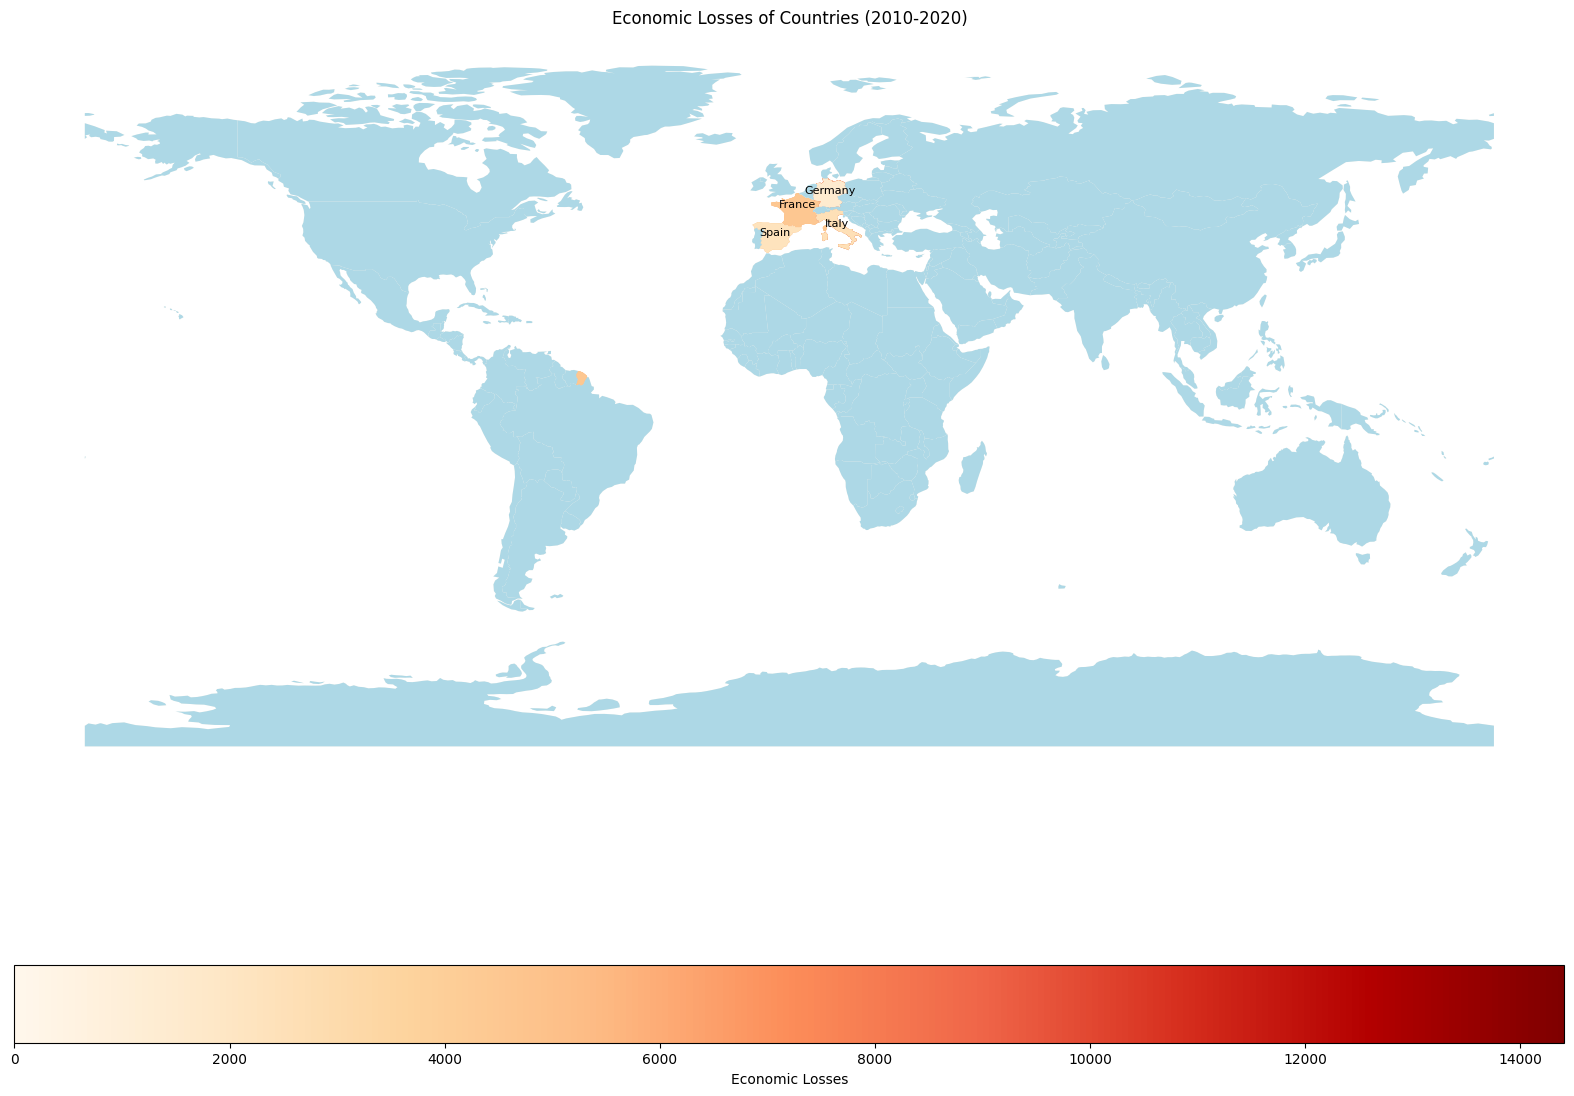

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Dünya haritasını yükleyin
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Veri çerçevenizi dünya haritasıyla birleştirin
df_world_teams = world.merge(merged_df, how="left", left_on='name', right_on='country')

# Boş değerleri doldurun
df_world_teams['economic_losses'] = df_world_teams['economic_losses'].fillna(0)
df_world_teams['NY.GDP.PCAP.CD'] = df_world_teams['NY.GDP.PCAP.CD'].fillna(0)

# Haritayı oluşturun
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Ekonomik kayıpları gösteren bir harita oluşturun
df_world_teams.plot(column='economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Economic Losses", "orientation": "horizontal"})

# Ekonomik kayıp olmayan ülkeleri açık mavi renge boyayın
world[~world['name'].isin(merged_df['country'])].plot(ax=ax, color='lightblue')

# İşlem yapılan dört ülkenin isimlerini ve konumlarını belirleyin
selected_countries = ['Italy', 'France', 'Spain', 'Germany']
for country in selected_countries:
    geometry = world[world['name'] == country]['geometry']
    centroid = geometry.centroid.values[0]
    # Fransa'nın ismini farklı bir konuma yerleştirin
    if country == 'France':
        ax.text(centroid.x + 5, centroid.y + 5, country, fontsize=8, ha='center', color='black')
    else:
        ax.text(centroid.x, centroid.y, country, fontsize=8, ha='center', color='black')

# Harita stilini ayarlayın
ax.set_title("Economic Losses of Countries (2010-2020)")
ax.set_axis_off()  # Eksenleri kapatır
plt.show()



<ipython-input-26-e22b57402816>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-26-e22b57402816>:32: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = geometry.centroid.values[0]


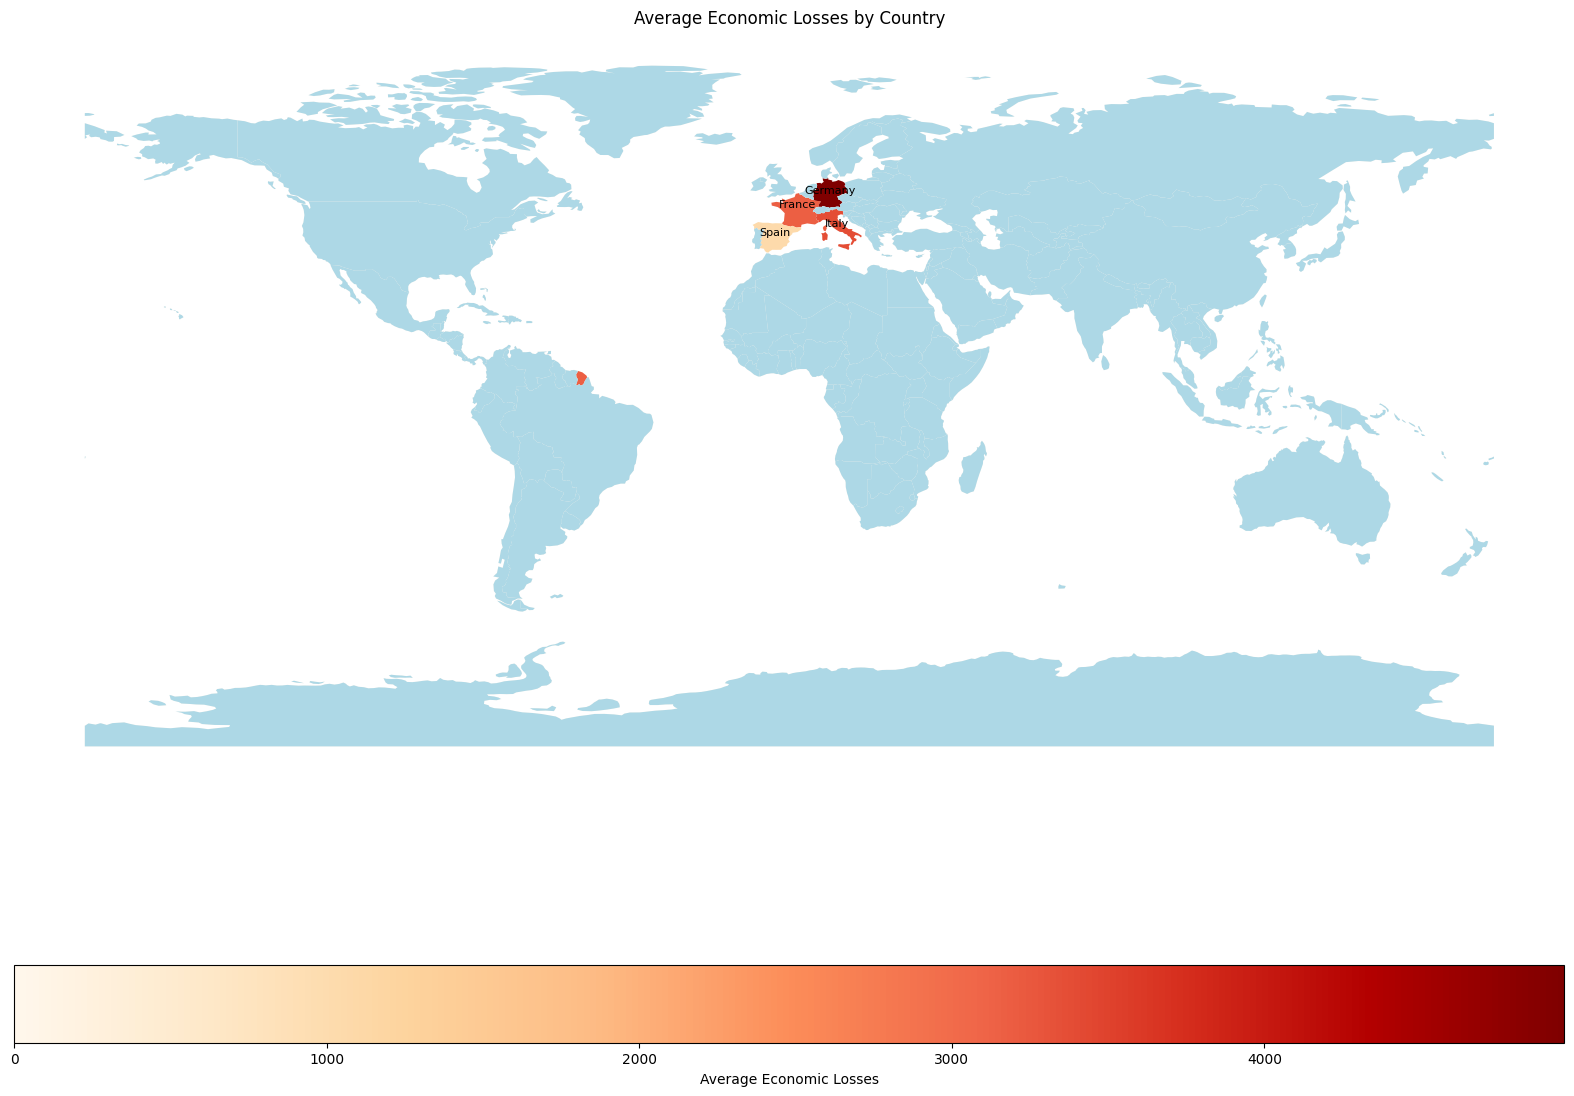

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ortalama ekonomik kayıpları ve ortalama GDP'yi hesaplayın
average_countries = merged_df.groupby('country').agg({'economic_losses': 'mean', 'NY.GDP.PCAP.CD': 'mean'}).reset_index()
average_countries.columns = ['country', 'average_economic_losses', 'average_GDP']

# Dünya haritasını yükleyin
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Veri çerçevenizi dünya haritasıyla birleştirin
df_world_teams = world.merge(average_countries, how="left", left_on='name', right_on='country')

# Boş değerleri doldurun
df_world_teams['average_economic_losses'] = df_world_teams['average_economic_losses'].fillna(0)
df_world_teams['average_GDP'] = df_world_teams['average_GDP'].fillna(0)

# Haritayı oluşturun
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Ortalama ekonomik kayıpları gösteren bir harita oluşturun
df_world_teams.plot(column='average_economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Average Economic Losses", "orientation": "horizontal"})

# Ortalama GDP olmayan ülkeleri açık mavi renge boyayın
world[~world['name'].isin(average_countries['country'])].plot(ax=ax, color='lightblue')

# Her ülkenin ismini ve konumunu belirleyin
for idx, row in average_countries.iterrows():
    country = row['country']
    geometry = world[world['name'] == country]['geometry']
    centroid = geometry.centroid.values[0]
    # Fransa için konumu ayarlayın
    if country == 'France':
        ax.text(centroid.x + 5, centroid.y + 5, country, fontsize=8, ha='center', color='black')
    else:
        ax.text(centroid.x, centroid.y, country, fontsize=8, ha='center', color='black')

# Harita stilini ayarlayın
ax.set_title("Average Economic Losses by Country")
ax.set_axis_off()  # Eksenleri kapatır
plt.show()



In [ ]:
print(merged_df)

    country  year  economic_losses  NY.GDP.PCAP.CD
0    France  2010           5023.0    40676.064791
1    France  2011           1702.0    43846.466076
2    France  2012           1595.0    40870.852365
3    France  2013           1789.0    42602.717965
4    France  2014           2737.0    43068.548724
5    France  2015            772.0    36652.922305
6    France  2016           1970.0    37062.533572
7    France  2017           5996.0    38781.049487
8    France  2018           3235.0    41557.854859
9    France  2019           5419.0    40494.898294
10   France  2020           4527.0    39179.744260
11  Germany  2010           5593.0    41572.455948
12  Germany  2011            826.0    46705.895796
13  Germany  2012            149.0    43855.854466
14  Germany  2013          14410.0    46298.922918
15  Germany  2014           2987.0    48023.869985
16  Germany  2015           2755.0    41103.256436
17  Germany  2016           3703.0    42136.120791
18  Germany  2017           536

<ipython-input-33-916cdcd5f123>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


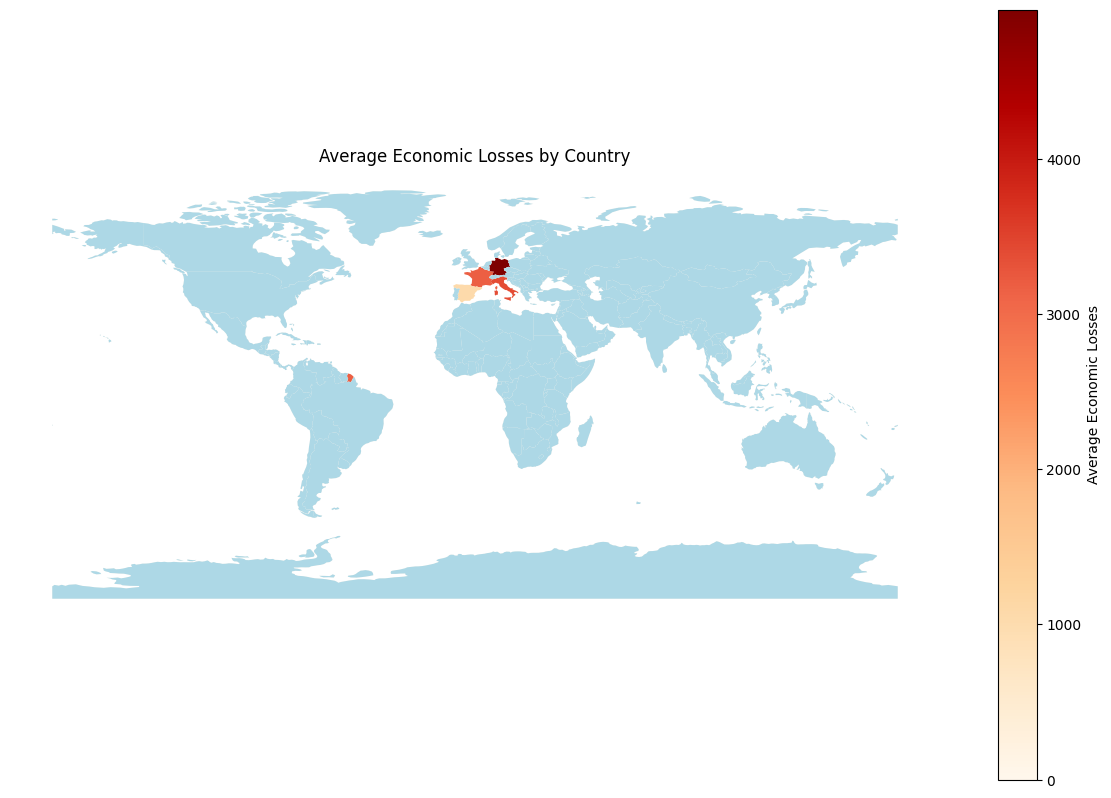

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Calculate the average economic losses and average GDP for each country
average_countries = merged_df.groupby('country').agg({'economic_losses': 'mean', 'NY.GDP.PCAP.CD': 'mean'}).reset_index()
average_countries.columns = ['country', 'average_economic_losses', 'average_GDP']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your DataFrame with the world map
df_world_teams = world.merge(average_countries, how="left", left_on='name', right_on='country')

# Fill in missing values
df_world_teams['average_economic_losses'] = df_world_teams['average_economic_losses'].fillna(0)
df_world_teams['average_GDP'] = df_world_teams['average_GDP'].fillna(0)

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a map showing average economic losses
df_world_teams.plot(column='average_economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Average Economic Losses", "orientation": "vertical"})

# Color countries with no average GDP in light blue
world[~world['name'].isin(average_countries['country'])].plot(ax=ax, color='lightblue')

# Set the map title
ax.set_title("Average Economic Losses by Country")

# Turn off the axis
ax.set_axis_off()

# Display the map
plt.show()



<ipython-input-44-7912e5aed84b>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


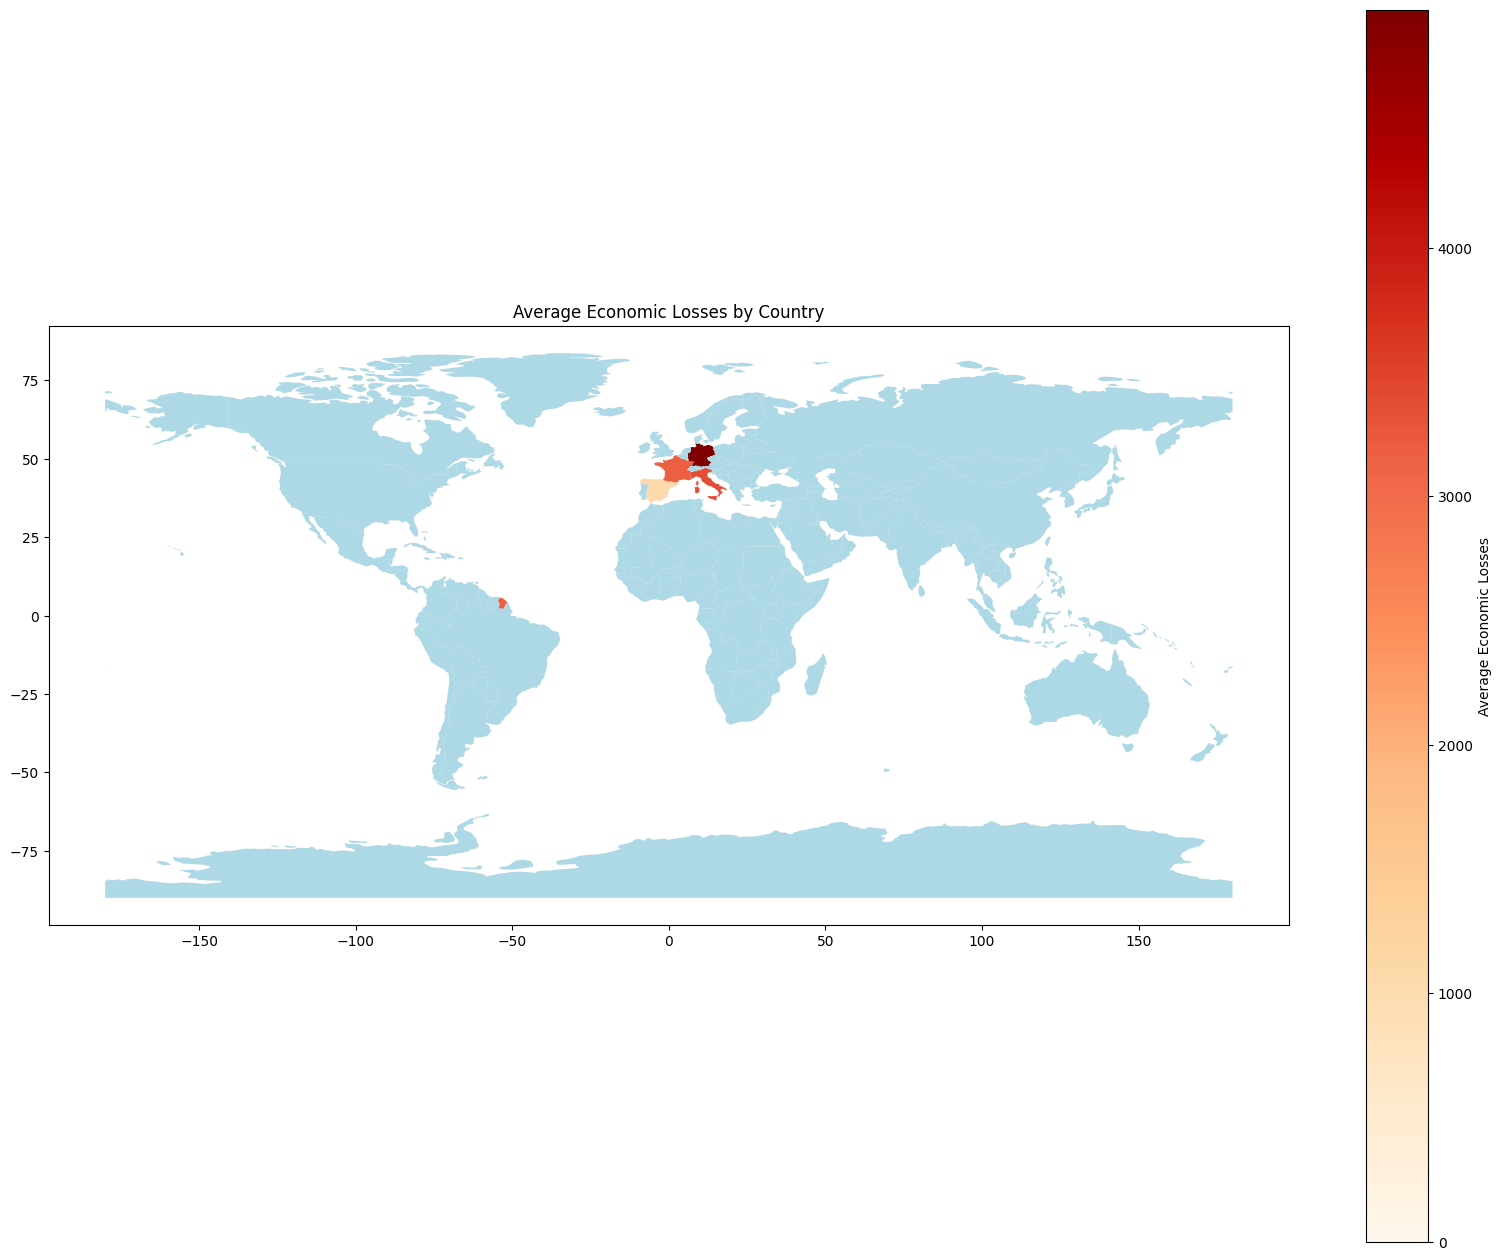

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Calculate the average economic losses and average GDP for each country
average_countries = merged_df.groupby('country').agg({'economic_losses': 'mean', 'NY.GDP.PCAP.CD': 'mean'}).reset_index()
average_countries.columns = ['country', 'average_economic_losses', 'average_GDP']

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your DataFrame with the world map
df_world_teams = world.merge(average_countries, how="left", left_on='name', right_on='country')

# Fill in missing values
df_world_teams['average_economic_losses'] = df_world_teams['average_economic_losses'].fillna(0)
df_world_teams['average_GDP'] = df_world_teams['average_GDP'].fillna(0)

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(20, 16))

# Create a map showing average economic losses
df_world_teams.plot(column='average_economic_losses', ax=ax, cmap='OrRd', legend=True,
                    legend_kwds={"label": "Average Economic Losses", "orientation": "vertical"})

# Color countries with no average GDP in light blue
world[~world['name'].isin(average_countries['country'])].plot(ax=ax, color='lightblue')

# Set the map title
ax.set_title("Average Economic Losses by Country")

# Turn off the axis
#ax.set_axis_off()

# Adjust the color bar size and padding
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad="1%")

# Create color bar
#sm = plt.cm.ScalarMappable(cmap='OrRd')
#sm._A = []  # fake up the array of the scalar mappable
#cbar = plt.colorbar(sm, cax=cax)
#cbar.set_label('Average Economic Losses')

# Remove the second color bar
#cbar.remove()

# Display the map
plt.show()



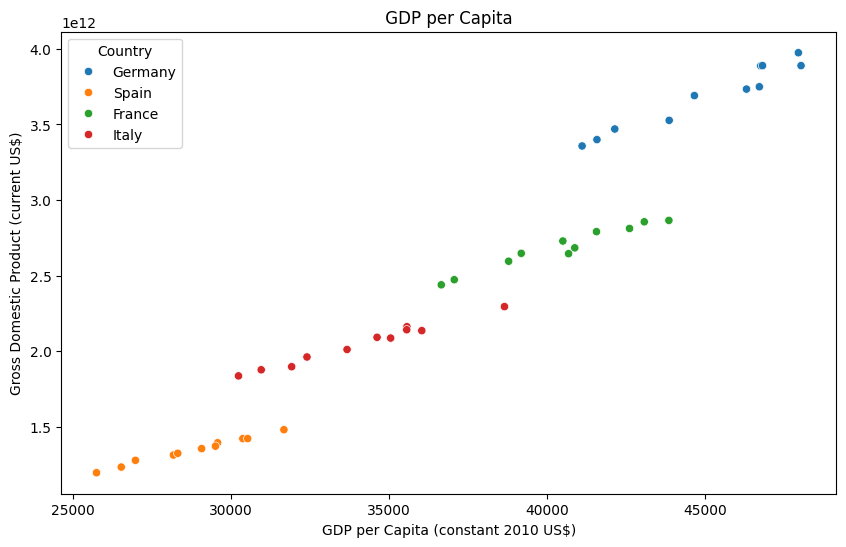

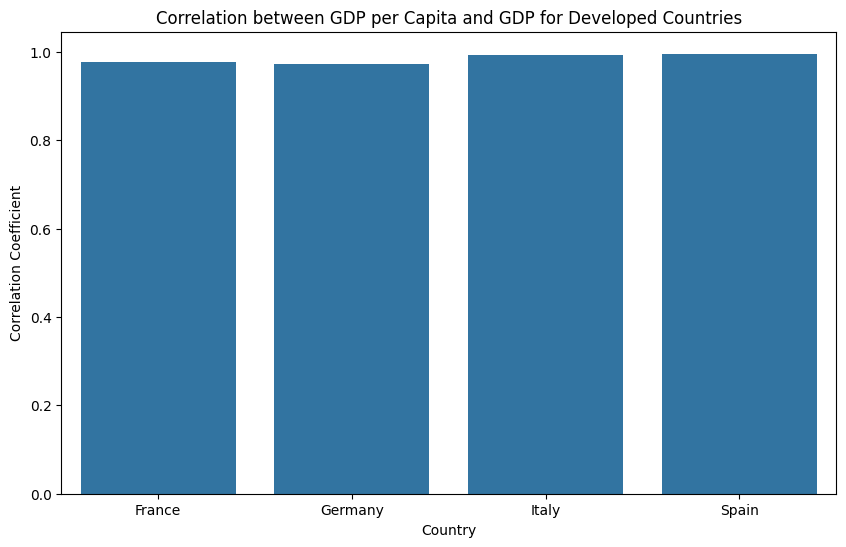

In [ ]:
# Data Acquisition
# Defining a list of developed countries including Germany, Italy, France, and Switzerland
developed_countries = ['DE', 'IT', 'FR', 'ES']
start_year = 2010
end_year = 2020

# Climate Loss Data
climate_loss_data = wb.download(indicator='NY.GDP.MKTP.CD', country=developed_countries, start=start_year, end=end_year)

# GDP Data
gdp_data = wb.download(indicator='NY.GDP.PCAP.CD', country=developed_countries, start=start_year, end=end_year)

# Data Cleaning and Merging
merged_data = pd.merge(climate_loss_data, gdp_data, on=['country', 'year'], suffixes=('_climate', '_gdp'))
merged_data.dropna(inplace=True)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NY.GDP.PCAP.CD', y='NY.GDP.MKTP.CD', hue='country', data=merged_data)
plt.title(' GDP per Capita ')
plt.xlabel('GDP per Capita (constant 2010 US$)')
plt.ylabel('Gross Domestic Product (current US$)')
plt.legend(title='Country')
plt.show()

# Calculate correlation for each country separately
correlation_df = merged_data.groupby('country').apply(lambda x: x['NY.GDP.MKTP.CD'].corr(x['NY.GDP.PCAP.CD'])).reset_index(name='correlation')

# Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='correlation', data=correlation_df)
plt.title('Correlation between GDP per Capita and GDP for Developed Countries')
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.show()